# Time Series Analysis on the data of international Airlines passengers from 1940 to 1960.


In [2]:
# import libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
# load the data from url 
# url = 'https://raw.githubusercotent.com/rajeevratan84/datascienceforbusiness/master/AirPassengers.csv'

# df = pd.read_csv(url)

df = pd.read_csv('07-Time-series-analysis/AirPassengers.csv')
df.head()



,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


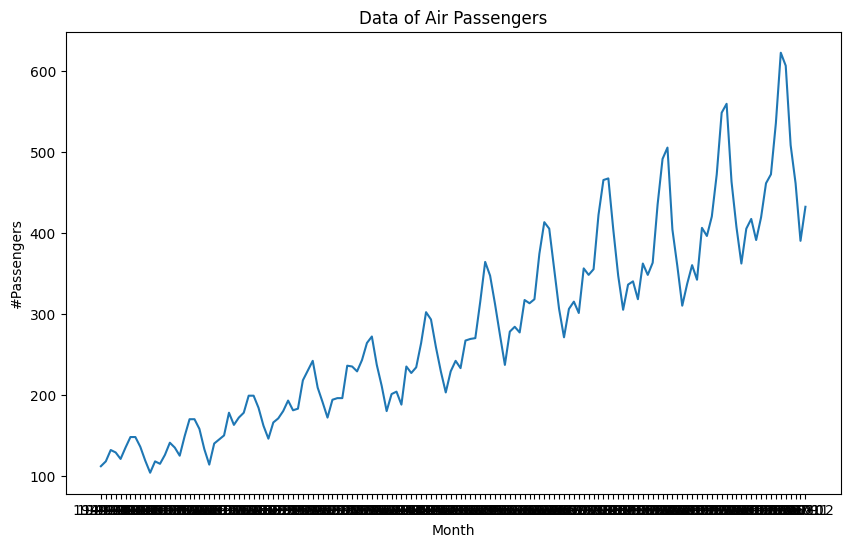

In [4]:
# we are going to draw a figure 
plt.figure(figsize=(10,6))
plt.plot(df['Month'],df['#Passengers'])
plt.title('Data of Air Passengers')
plt.xlabel('Month')
plt.ylabel('#Passengers')
plt.show()

<Axes: xlabel='Month', ylabel='#Passengers'>

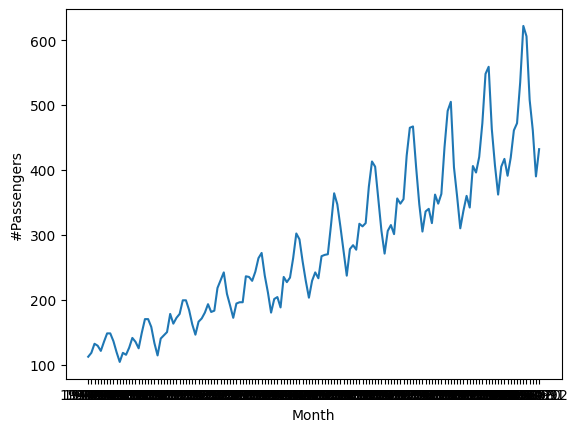

In [5]:
# plot the same plot with seaborn to see trends and seasonality
sns.lineplot(x='Month',y='#Passengers',data=df)

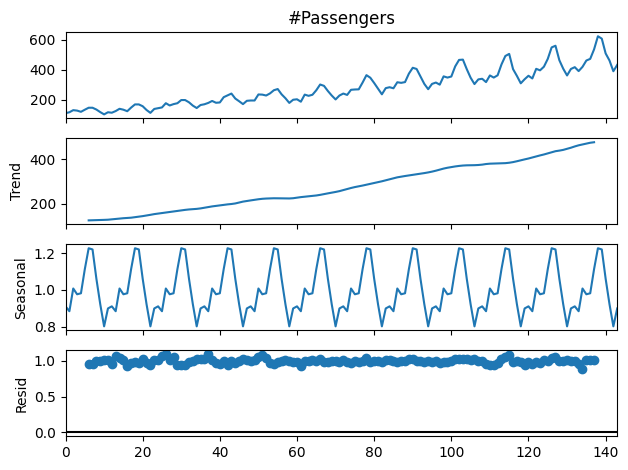

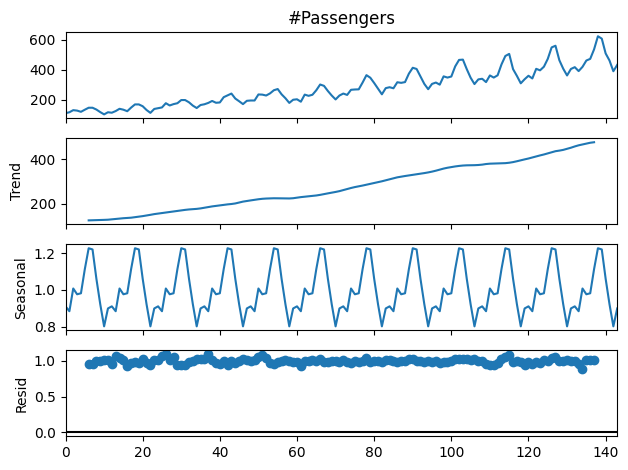

In [6]:
# let's decompose this data  into its components
decompose= seasonal_decompose(df['#Passengers'],model='multiplicative',period=12)
decompose.plot()

<Axes: >

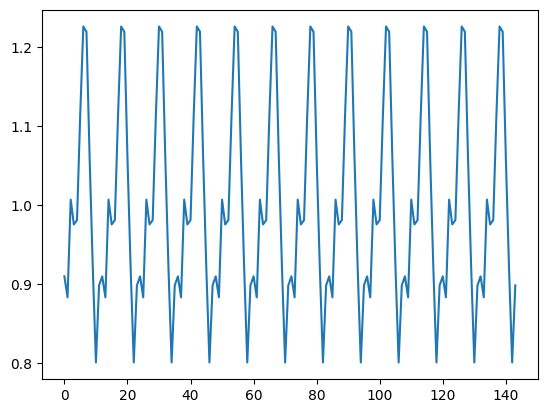

In [7]:
decompose.seasonal.plot()

<Axes: >

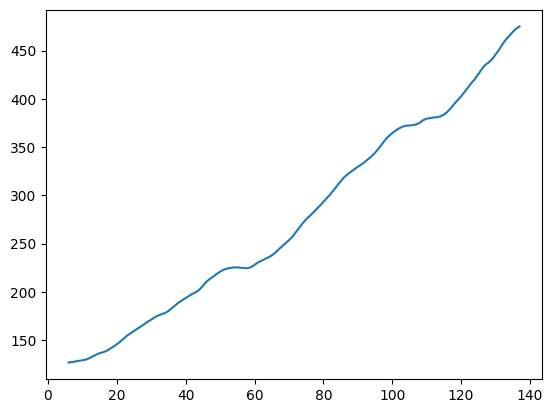

In [8]:
decompose.trend.plot()

<Axes: >

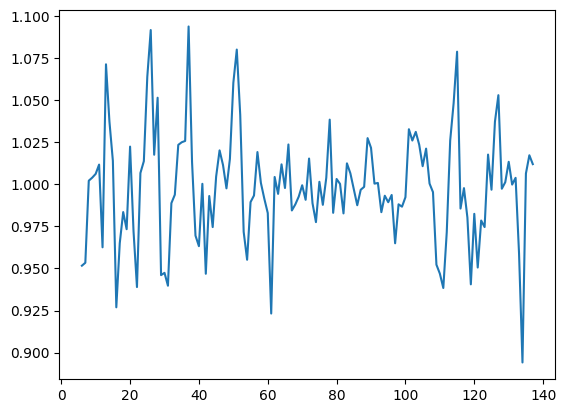

In [9]:
decompose.resid.plot()

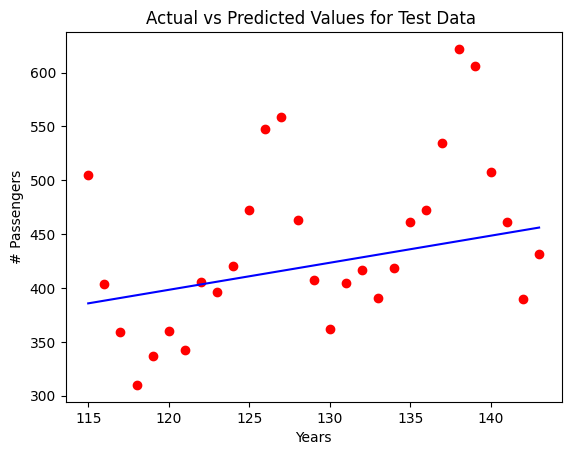

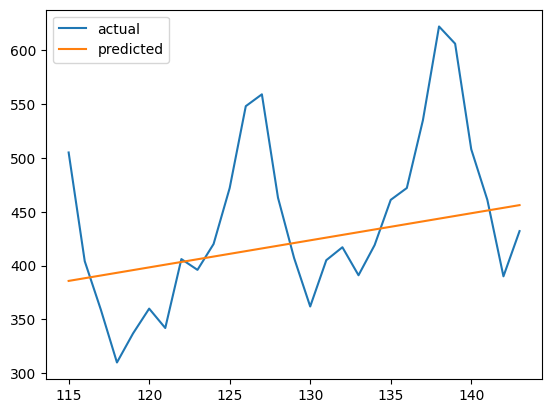

In [10]:
# use linear regression model here on this dataset with 80 to 20 split
df.head()
df_train = int(len(df)*0.8)
train = df[:df_train]
test = df[df_train:]
# calling simpler linear regression 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train.index.values.reshape((-1, 1)), train['#Passengers'])

# get the predication from model 
prediction=model.predict(test.index.values.reshape(-1,1))
# plot the acutal and predicated  values of test data

plt.scatter(test.index  .values,test['#Passengers'],color='red')
plt.plot(test.index.values , prediction, color='blue')
plt.xlabel('Years')
plt.ylabel('# Passengers')
plt.title('Actual vs Predicted Values for Test Data ')
plt.show()

# plot this using lineplot
plt.plot(test.index, test['#Passengers'],label='actual')
plt.plot(test.index,prediction,label='predicted')
plt.legend()
plt.show()
                                                                                  
                                                                                                                




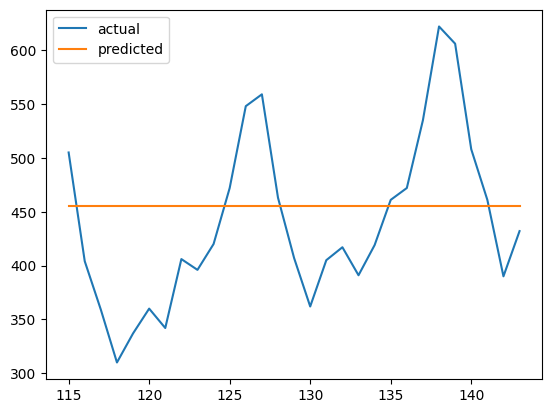

In [11]:
from sklearn.ensemble import RandomForestRegressor
# creating an instance of rfr

rfr = RandomForestRegressor()
# fitting the model to data
rfr.fit(train.index.values.reshape(-1,1),train['#Passengers'])
# making predictions on test data
predication1 =rfr.predict(test.index.values.reshape(-1,1))

plt.plot(test.index,test['#Passengers'],label='actual')
plt.plot(test.index,predication1,label='predicted')
plt.legend()
plt.show()

In [12]:
# from xgboost import XGBRegressor
# # initilze xgb regessor
# model = XGBRegressor()
# model.fit(train.index.values.reshape(-1,1),train['#Passengers'])
# prediction =model.predict(test.index.values.reshape(-1,1))
# # plot the prediction 
# plt.plot(test.index ,test['#Passengers'],label='actual' )
# plt.plot(test.index,prediction,label='predicated')
# plt.legend()
# plt.show()

ModuleNotFoundError: No module named 'xgboost'



Epoch 1/100

4/4 [==============================] - 4s 258ms/step - loss: 0.2577 - val_loss: 1.0958
Epoch 2/100
4/4 [==============================] - 0s 46ms/step - loss: 0.2220 - val_loss: 0.9711
Epoch 3/100
4/4 [==============================] - 0s 40ms/step - loss: 0.1903 - val_loss: 0.8580
Epoch 4/100
4/4 [==============================] - 0s 52ms/step - loss: 0.1617 - val_loss: 0.7471
Epoch 5/100
4/4 [==============================] - 0s 42ms/step - loss: 0.1354 - val_loss: 0.6403
Epoch 6/100
4/4 [==============================] - 0s 41ms/step - loss: 0.1097 - val_loss: 0.5284
Epoch 7/100
4/4 [==============================] - 0s 39ms/step - loss: 0.0810 - val_loss: 0.3976
Epoch 8/100
4/4 [==============================] - 0s 37ms/step - loss: 0.0525 - val_loss: 0.2424
Epoch 9/100
4/4 [==============================] - 0s 34ms/step - loss: 0.0329 - val_loss: 0.1038
Epoch 10/100
4/4 [==============================] - 0s 59ms/step - loss: 0.0252 - val_loss: 0.0499
Epoch 11/100
4/

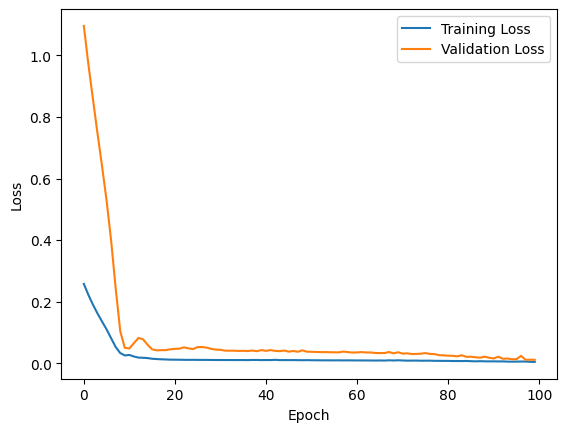

1/1 [==============================] - 0s 321ms/step


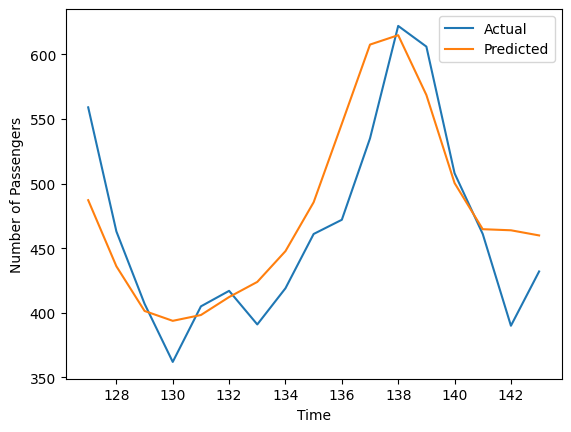

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Assuming 'train' and 'test' are your training and testing datasets respectively
# Make sure they are DataFrame objects with a column named '#Passengers'

# Preprocessing: Scaling the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train['#Passengers'].values.reshape(-1, 1))
test_scaled = scaler.transform(test['#Passengers'].values.reshape(-1, 1))

# Define a function to create input-output sequences for time series forecasting
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

# Hyperparameters
seq_length = 12  # Sequence length for input
n_features = 1   # Number of features (just the number of passengers)

# Create input-output sequences
X_train, y_train = create_sequences(train_scaled, seq_length)
X_test, y_test = create_sequences(test_scaled, seq_length)

# Reshape input sequences for compatibility with LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

# Define the model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predict on test data
y_pred = model.predict(X_test)

# Plot actual vs predicted
plt.plot(test.index[seq_length:], scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual')
plt.plot(test.index[seq_length:], scaler.inverse_transform(y_pred), label='Predicted')
plt.xlabel('Time')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()


In [14]:
train

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
110,1958-03,362
111,1958-04,348
112,1958-05,363
113,1958-06,435
